In [3]:
from theano import function, config, shared, tensor
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], tensor.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, tensor.Elemwise) and
              ('Gpu' not in type(x.op).__name__)
              for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

[GpuElemwise{exp,no_inplace}(<GpuArrayType<None>(float32, vector)>), HostFromGpu(gpuarray)(GpuElemwise{exp,no_inplace}.0)]
Looping 1000 times took 0.247004 seconds
Result is [ 1.23178029  1.61879349  1.52278066 ...,  2.20771813  2.29967761
  1.62323296]
Used the gpu


In [1]:
import theano

Using cuDNN version 6021 on context None
Preallocating 6553/8192 Mb (0.800000) on cuda0
Mapped name None to device cuda0: GeForce GTX 1080 (0000:01:00.0)


In [2]:
theano.config.dnn.include_path

'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v8.0\\include'

In [77]:
# http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os
import numpy as np
import copy

plt.ion()

In [7]:
data_mean, data_std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(225),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(data_mean, data_std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

data_dir = os.path.abspath('../../_data/hymenoptera_data')
image_datasets = {name: datasets.ImageFolder(os.path.join(data_dir, name), trans) for name, trans in data_transforms.items()}
data_loaders = {name: torch.utils.data.DataLoader(sets, batch_size=4, shuffle=True, num_workers=4)
                    for name, sets in image_datasets.items()}
dataset_size = {name: len(sets) for name, sets in image_datasets.items()}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()

In [33]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1,2,0))
    inp = data_std * inp + data_mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

inputs, classes = next(iter(data_loaders['train']))

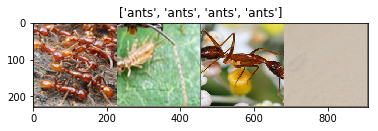

In [40]:
grids = torchvision.utils.make_grid(inputs)
imshow(grids, title=[class_names[i] for i in classes])

In [46]:
model_ft = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\Doctor/.torch\models\resnet18-5c106cde.pth
100%|██████████████████████████████████████████████████████████████████| 46827520/46827520 [00:48<00:00, 967420.85it/s]


In [58]:
model_ft.fc = nn.Linear(model_ft.fc.in_features, 2); model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (b

In [74]:
loss = nn.CrossEntropyLoss()
opt_ft = optim.Adam(model_ft.fc.parameters())
exp_lr_scheduler = lr_scheduler.ExponentialLR(opt_ft, gamma=0.1)

In [69]:
def train_model(model, loss, opt, lr_sch, epochs):
    best_model_wts = copy.deepcopy(model.state_dic())

[0.01]

In [ ]:
train_model(model_ft, loss, opt_ft, exp_lr_scheduler, 5)

In [82]:
d = model_ft.state_dict()